In [10]:
import numpy as np
import pickle

In [2]:
def transform_input_text(self, texts):
    temp = []
    for line in texts:
        x = []
        for word in line.lower().split(' '):
            wid = 1
            if word in self.input_word2idx:
                wid = self.input_word2idx[word]
            x.append(wid)
            if len(x) >= self.max_input_seq_length:
                break
        temp.append(x)
    temp = pad_sequences(temp, maxlen=self.max_input_seq_length)

    print(temp.shape)
    return temp

In [309]:
dirs = os.listdir('Part1')[1:]
print('Part1'+'/' +str(dirs[0]))

Part1/awards_1990


In [340]:
import numpy as np
import os

def split():
    titles = []
    texts = []
    root = 'Part1'
    for p1 in os.listdir(root)[1:]:
        dir1 = root + '/' + str(p1)
        print(dir1)
        for p2 in os.listdir(dir1)[1:]:
            dir2 = dir1 + '/' + str(p2)
            print(dir2)
    
    #dirr = 'Part1/awards_1990/awd_1990_00/'
    #dirs = os.listdir('Part1/awards_1990/awd_1990_00/')

    #for filename in dirs[1:]:
    #iter = 0
    #print(dirs[1])
            for filename in os.listdir(dir2)[1:]:
                print(dir2 + '/' + filename)
                #print(iter)
                #iter += 1
                #print(dirs[1:])
                #filename = 'Part1/awards_1990/awd_1990_00/a9000006.txt'
                f = open(dir2 + '/' + filename)
                addTitle = False
                addTexts = False
                title = []
                text = []
                for word in f.read().split():
                    if (word == "Title"):
                        addTitle = True
                        continue

                    if (word == "\n"):
                        addTitle = False
                        
                    if (addTexts == True and word == "\n"):
                        addTexts = False
                        break
                        

                    if (word == "Abstract"):
                        addTexts = True
                        continue

                    if(addTitle == True):
                        title.append(word)

                    if(addTexts == True):
                        text.append(word)

                for i in range(len(title)):
                    s = title[i]
                    table = str.maketrans({key: None for key in string.punctuation})
                    new_s = s.translate(table)
                    title[i] = new_s
                for i in range(len(text)):
                    s = text[i]
                    table = str.maketrans({key: None for key in string.punctuation})
                    new_s = s.translate(table)
                    text[i] = new_s

        title = ' '.join(title)
        text =' '.join(text)
        titles.append(title)
        texts.append(text)

#     f=open("titles.txt", 'w')
#     for i in titles:
#         f.write(i)
#         f.write(' ')

#     t=open("texts.txt", 'w')
#     for i in texts:
#         t.write(i)
#         t.write(' ')

#     f.close()
#     t.close()
    return titles, texts


In [358]:
if __name__ == '__main__':
    titles, texts = split()


Part1/awards_1990
Part1/awards_1990/awd_1990_00
Part1/awards_1990/awd_1990_00/a9000006.txt
Part1/awards_1990/awd_1990_00/a9000031.txt
Part1/awards_1990/awd_1990_00/a9000038.txt
Part1/awards_1990/awd_1990_00/a9000040.txt
Part1/awards_1990/awd_1990_00/a9000043.txt
Part1/awards_1990/awd_1990_00/a9000045.txt
Part1/awards_1990/awd_1990_00/a9000046.txt
Part1/awards_1990/awd_1990_00/a9000048.txt
Part1/awards_1990/awd_1990_00/a9000049.txt
Part1/awards_1990/awd_1990_00/a9000050.txt
Part1/awards_1990/awd_1990_00/a9000052.txt
Part1/awards_1990/awd_1990_00/a9000053.txt
Part1/awards_1990/awd_1990_00/a9000054.txt
Part1/awards_1990/awd_1990_00/a9000057.txt
Part1/awards_1990/awd_1990_00/a9000058.txt
Part1/awards_1990/awd_1990_00/a9000060.txt
Part1/awards_1990/awd_1990_00/a9000063.txt
Part1/awards_1990/awd_1990_00/a9000075.txt
Part1/awards_1990/awd_1990_00/a9000089.txt
Part1/awards_1990/awd_1990_00/a9000091.txt
Part1/awards_1990/awd_1990_00/a9000094.txt
Part1/awards_1990/awd_1990_00/a9000099.txt
Part1/

Part1/awards_1990/awd_1990_00/a9000879.txt
Part1/awards_1990/awd_1990_00/a9000884.txt
Part1/awards_1990/awd_1990_00/a9000887.txt
Part1/awards_1990/awd_1990_00/a9000888.txt
Part1/awards_1990/awd_1990_00/a9000892.txt
Part1/awards_1990/awd_1990_00/a9000893.txt
Part1/awards_1990/awd_1990_00/a9000894.txt
Part1/awards_1990/awd_1990_00/a9000899.txt
Part1/awards_1990/awd_1990_00/a9000903.txt
Part1/awards_1990/awd_1990_00/a9000907.txt
Part1/awards_1990/awd_1990_00/a9000915.txt
Part1/awards_1990/awd_1990_00/a9000921.txt
Part1/awards_1990/awd_1990_00/a9000925.txt
Part1/awards_1990/awd_1990_00/a9000926.txt
Part1/awards_1990/awd_1990_00/a9000927.txt
Part1/awards_1990/awd_1990_00/a9000930.txt
Part1/awards_1990/awd_1990_00/a9000933.txt
Part1/awards_1990/awd_1990_00/a9000935.txt
Part1/awards_1990/awd_1990_00/a9000937.txt
Part1/awards_1990/awd_1990_00/a9000938.txt
Part1/awards_1990/awd_1990_00/a9000939.txt
Part1/awards_1990/awd_1990_00/a9000941.txt
Part1/awards_1990/awd_1990_00/a9000942.txt
Part1/award

Part1/awards_1990/awd_1990_01/a9001874.txt
Part1/awards_1990/awd_1990_01/a9001876.txt
Part1/awards_1990/awd_1990_01/a9001878.txt
Part1/awards_1990/awd_1990_01/a9001881.txt
Part1/awards_1990/awd_1990_01/a9001883.txt
Part1/awards_1990/awd_1990_01/a9001886.txt
Part1/awards_1990/awd_1990_01/a9001887.txt
Part1/awards_1990/awd_1990_01/a9001890.txt
Part1/awards_1990/awd_1990_01/a9001891.txt
Part1/awards_1990/awd_1990_01/a9001895.txt
Part1/awards_1990/awd_1990_01/a9001897.txt
Part1/awards_1990/awd_1990_01/a9001903.txt
Part1/awards_1990/awd_1990_01/a9001914.txt
Part1/awards_1990/awd_1990_01/a9001919.txt
Part1/awards_1990/awd_1990_01/a9001921.txt
Part1/awards_1990/awd_1990_01/a9001924.txt
Part1/awards_1990/awd_1990_01/a9001930.txt
Part1/awards_1990/awd_1990_01/a9001936.txt
Part1/awards_1990/awd_1990_01/a9001940.txt
Part1/awards_1990/awd_1990_01/a9001941.txt
Part1/awards_1990/awd_1990_01/a9001944.txt
Part1/awards_1990/awd_1990_01/a9001946.txt
Part1/awards_1990/awd_1990_01/a9001947.txt
Part1/award

Part1/awards_1990/awd_1990_04/a9004491.txt
Part1/awards_1990/awd_1990_04/a9004492.txt
Part1/awards_1990/awd_1990_04/a9004498.txt
Part1/awards_1990/awd_1990_04/a9004502.txt
Part1/awards_1990/awd_1990_04/a9004511.txt
Part1/awards_1990/awd_1990_04/a9004519.txt
Part1/awards_1990/awd_1990_04/a9004526.txt
Part1/awards_1990/awd_1990_04/a9004528.txt
Part1/awards_1990/awd_1990_04/a9004534.txt
Part1/awards_1990/awd_1990_04/a9004537.txt
Part1/awards_1990/awd_1990_04/a9004547.txt
Part1/awards_1990/awd_1990_04/a9004549.txt
Part1/awards_1990/awd_1990_04/a9004552.txt
Part1/awards_1990/awd_1990_04/a9004555.txt
Part1/awards_1990/awd_1990_04/a9004556.txt
Part1/awards_1990/awd_1990_04/a9004557.txt
Part1/awards_1990/awd_1990_04/a9004559.txt
Part1/awards_1990/awd_1990_04/a9004560.txt
Part1/awards_1990/awd_1990_04/a9004561.txt
Part1/awards_1990/awd_1990_04/a9004567.txt
Part1/awards_1990/awd_1990_04/a9004568.txt
Part1/awards_1990/awd_1990_04/a9004570.txt
Part1/awards_1990/awd_1990_04/a9004573.txt
Part1/award

Part1/awards_1990/awd_1990_06/a9006612.txt
Part1/awards_1990/awd_1990_06/a9006621.txt
Part1/awards_1990/awd_1990_06/a9006622.txt
Part1/awards_1990/awd_1990_06/a9006623.txt
Part1/awards_1990/awd_1990_06/a9006624.txt
Part1/awards_1990/awd_1990_06/a9006625.txt
Part1/awards_1990/awd_1990_06/a9006628.txt
Part1/awards_1990/awd_1990_06/a9006629.txt
Part1/awards_1990/awd_1990_06/a9006637.txt
Part1/awards_1990/awd_1990_06/a9006639.txt
Part1/awards_1990/awd_1990_06/a9006643.txt
Part1/awards_1990/awd_1990_06/a9006644.txt
Part1/awards_1990/awd_1990_06/a9006647.txt
Part1/awards_1990/awd_1990_06/a9006651.txt
Part1/awards_1990/awd_1990_06/a9006660.txt
Part1/awards_1990/awd_1990_06/a9006667.txt
Part1/awards_1990/awd_1990_06/a9006671.txt
Part1/awards_1990/awd_1990_06/a9006672.txt
Part1/awards_1990/awd_1990_06/a9006674.txt
Part1/awards_1990/awd_1990_06/a9006676.txt
Part1/awards_1990/awd_1990_06/a9006678.txt
Part1/awards_1990/awd_1990_06/a9006681.txt
Part1/awards_1990/awd_1990_06/a9006684.txt
Part1/award

Part1/awards_1990/awd_1990_08/a9008816.txt
Part1/awards_1990/awd_1990_08/a9008818.txt
Part1/awards_1990/awd_1990_08/a9008820.txt
Part1/awards_1990/awd_1990_08/a9008826.txt
Part1/awards_1990/awd_1990_08/a9008827.txt
Part1/awards_1990/awd_1990_08/a9008828.txt
Part1/awards_1990/awd_1990_08/a9008838.txt
Part1/awards_1990/awd_1990_08/a9008839.txt
Part1/awards_1990/awd_1990_08/a9008840.txt
Part1/awards_1990/awd_1990_08/a9008846.txt
Part1/awards_1990/awd_1990_08/a9008848.txt
Part1/awards_1990/awd_1990_08/a9008849.txt
Part1/awards_1990/awd_1990_08/a9008853.txt
Part1/awards_1990/awd_1990_08/a9008860.txt
Part1/awards_1990/awd_1990_08/a9008863.txt
Part1/awards_1990/awd_1990_08/a9008871.txt
Part1/awards_1990/awd_1990_08/a9008872.txt
Part1/awards_1990/awd_1990_08/a9008877.txt
Part1/awards_1990/awd_1990_08/a9008880.txt
Part1/awards_1990/awd_1990_08/a9008882.txt
Part1/awards_1990/awd_1990_08/a9008883.txt
Part1/awards_1990/awd_1990_08/a9008885.txt
Part1/awards_1990/awd_1990_08/a9008886.txt
Part1/award

Part1/awards_1990/awd_1990_11/a9011801.txt
Part1/awards_1990/awd_1990_11/a9011802.txt
Part1/awards_1990/awd_1990_11/a9011803.txt
Part1/awards_1990/awd_1990_11/a9011804.txt
Part1/awards_1990/awd_1990_11/a9011805.txt
Part1/awards_1990/awd_1990_11/a9011806.txt
Part1/awards_1990/awd_1990_11/a9011807.txt
Part1/awards_1990/awd_1990_11/a9011811.txt
Part1/awards_1990/awd_1990_11/a9011814.txt
Part1/awards_1990/awd_1990_11/a9011819.txt
Part1/awards_1990/awd_1990_11/a9011822.txt
Part1/awards_1990/awd_1990_11/a9011824.txt
Part1/awards_1990/awd_1990_11/a9011828.txt
Part1/awards_1990/awd_1990_11/a9011829.txt
Part1/awards_1990/awd_1990_11/a9011833.txt
Part1/awards_1990/awd_1990_11/a9011834.txt
Part1/awards_1990/awd_1990_11/a9011835.txt
Part1/awards_1990/awd_1990_11/a9011837.txt
Part1/awards_1990/awd_1990_11/a9011840.txt
Part1/awards_1990/awd_1990_11/a9011844.txt
Part1/awards_1990/awd_1990_11/a9011845.txt
Part1/awards_1990/awd_1990_11/a9011846.txt
Part1/awards_1990/awd_1990_11/a9011848.txt
Part1/award

Part1/awards_1990/awd_1990_13/a9013932.txt
Part1/awards_1990/awd_1990_13/a9013934.txt
Part1/awards_1990/awd_1990_13/a9013936.txt
Part1/awards_1990/awd_1990_13/a9013937.txt
Part1/awards_1990/awd_1990_13/a9013941.txt
Part1/awards_1990/awd_1990_13/a9013942.txt
Part1/awards_1990/awd_1990_13/a9013944.txt
Part1/awards_1990/awd_1990_13/a9013946.txt
Part1/awards_1990/awd_1990_13/a9013948.txt
Part1/awards_1990/awd_1990_13/a9013952.txt
Part1/awards_1990/awd_1990_13/a9013961.txt
Part1/awards_1990/awd_1990_13/a9013965.txt
Part1/awards_1990/awd_1990_13/a9013966.txt
Part1/awards_1990/awd_1990_13/a9013967.txt
Part1/awards_1990/awd_1990_13/a9013972.txt
Part1/awards_1990/awd_1990_13/a9013974.txt
Part1/awards_1990/awd_1990_13/a9013977.txt
Part1/awards_1990/awd_1990_13/a9013978.txt
Part1/awards_1990/awd_1990_13/a9013979.txt
Part1/awards_1990/awd_1990_13/a9013981.txt
Part1/awards_1990/awd_1990_13/a9013982.txt
Part1/awards_1990/awd_1990_13/a9013984.txt
Part1/awards_1990/awd_1990_13/a9013991.txt
Part1/award

Part1/awards_1990/awd_1990_15/a9015726.txt
Part1/awards_1990/awd_1990_15/a9015728.txt
Part1/awards_1990/awd_1990_15/a9015729.txt
Part1/awards_1990/awd_1990_15/a9015732.txt
Part1/awards_1990/awd_1990_15/a9015734.txt
Part1/awards_1990/awd_1990_15/a9015735.txt
Part1/awards_1990/awd_1990_15/a9015738.txt
Part1/awards_1990/awd_1990_15/a9015749.txt
Part1/awards_1990/awd_1990_15/a9015751.txt
Part1/awards_1990/awd_1990_15/a9015752.txt
Part1/awards_1990/awd_1990_15/a9015755.txt
Part1/awards_1990/awd_1990_15/a9015757.txt
Part1/awards_1990/awd_1990_15/a9015758.txt
Part1/awards_1990/awd_1990_15/a9015761.txt
Part1/awards_1990/awd_1990_15/a9015764.txt
Part1/awards_1990/awd_1990_15/a9015765.txt
Part1/awards_1990/awd_1990_15/a9015768.txt
Part1/awards_1990/awd_1990_15/a9015769.txt
Part1/awards_1990/awd_1990_15/a9015771.txt
Part1/awards_1990/awd_1990_15/a9015773.txt
Part1/awards_1990/awd_1990_15/a9015775.txt
Part1/awards_1990/awd_1990_15/a9015776.txt
Part1/awards_1990/awd_1990_15/a9015786.txt
Part1/award

Part1/awards_1990/awd_1990_17/a9017598.txt
Part1/awards_1990/awd_1990_17/a9017609.txt
Part1/awards_1990/awd_1990_17/a9017611.txt
Part1/awards_1990/awd_1990_17/a9017612.txt
Part1/awards_1990/awd_1990_17/a9017615.txt
Part1/awards_1990/awd_1990_17/a9017618.txt
Part1/awards_1990/awd_1990_17/a9017623.txt
Part1/awards_1990/awd_1990_17/a9017624.txt
Part1/awards_1990/awd_1990_17/a9017625.txt
Part1/awards_1990/awd_1990_17/a9017626.txt
Part1/awards_1990/awd_1990_17/a9017629.txt
Part1/awards_1990/awd_1990_17/a9017637.txt
Part1/awards_1990/awd_1990_17/a9017646.txt
Part1/awards_1990/awd_1990_17/a9017649.txt
Part1/awards_1990/awd_1990_17/a9017650.txt
Part1/awards_1990/awd_1990_17/a9017654.txt
Part1/awards_1990/awd_1990_17/a9017657.txt
Part1/awards_1990/awd_1990_17/a9017660.txt
Part1/awards_1990/awd_1990_17/a9017661.txt
Part1/awards_1990/awd_1990_17/a9017664.txt
Part1/awards_1990/awd_1990_17/a9017667.txt
Part1/awards_1990/awd_1990_17/a9017670.txt
Part1/awards_1990/awd_1990_17/a9017678.txt
Part1/award

Part1/awards_1990/awd_1990_19/a9019567.txt
Part1/awards_1990/awd_1990_19/a9019570.txt
Part1/awards_1990/awd_1990_19/a9019572.txt
Part1/awards_1990/awd_1990_19/a9019575.txt
Part1/awards_1990/awd_1990_19/a9019576.txt
Part1/awards_1990/awd_1990_19/a9019580.txt
Part1/awards_1990/awd_1990_19/a9019581.txt
Part1/awards_1990/awd_1990_19/a9019585.txt
Part1/awards_1990/awd_1990_19/a9019591.txt
Part1/awards_1990/awd_1990_19/a9019596.txt
Part1/awards_1990/awd_1990_19/a9019603.txt
Part1/awards_1990/awd_1990_19/a9019605.txt
Part1/awards_1990/awd_1990_19/a9019607.txt
Part1/awards_1990/awd_1990_19/a9019612.txt
Part1/awards_1990/awd_1990_19/a9019614.txt
Part1/awards_1990/awd_1990_19/a9019615.txt
Part1/awards_1990/awd_1990_19/a9019619.txt
Part1/awards_1990/awd_1990_19/a9019620.txt
Part1/awards_1990/awd_1990_19/a9019622.txt
Part1/awards_1990/awd_1990_19/a9019624.txt
Part1/awards_1990/awd_1990_19/a9019625.txt
Part1/awards_1990/awd_1990_19/a9019629.txt
Part1/awards_1990/awd_1990_19/a9019633.txt
Part1/award

Part1/awards_1990/awd_1990_22/a9022071.txt
Part1/awards_1990/awd_1990_22/a9022073.txt
Part1/awards_1990/awd_1990_22/a9022076.txt
Part1/awards_1990/awd_1990_22/a9022077.txt
Part1/awards_1990/awd_1990_22/a9022078.txt
Part1/awards_1990/awd_1990_22/a9022080.txt
Part1/awards_1990/awd_1990_22/a9022082.txt
Part1/awards_1990/awd_1990_22/a9022086.txt
Part1/awards_1990/awd_1990_22/a9022087.txt
Part1/awards_1990/awd_1990_22/a9022088.txt
Part1/awards_1990/awd_1990_22/a9022089.txt
Part1/awards_1990/awd_1990_22/a9022090.txt
Part1/awards_1990/awd_1990_22/a9022092.txt
Part1/awards_1990/awd_1990_22/a9022093.txt
Part1/awards_1990/awd_1990_22/a9022103.txt
Part1/awards_1990/awd_1990_22/a9022109.txt
Part1/awards_1990/awd_1990_22/a9022111.txt
Part1/awards_1990/awd_1990_22/a9022115.txt
Part1/awards_1990/awd_1990_22/a9022116.txt
Part1/awards_1990/awd_1990_22/a9022117.txt
Part1/awards_1990/awd_1990_22/a9022118.txt
Part1/awards_1990/awd_1990_22/a9022119.txt
Part1/awards_1990/awd_1990_22/a9022120.txt
Part1/award

Part1/awards_1990/awd_1990_23/a9023750.txt
Part1/awards_1990/awd_1990_23/a9023754.txt
Part1/awards_1990/awd_1990_23/a9023760.txt
Part1/awards_1990/awd_1990_23/a9023761.txt
Part1/awards_1990/awd_1990_23/a9023765.txt
Part1/awards_1990/awd_1990_23/a9023767.txt
Part1/awards_1990/awd_1990_23/a9023770.txt
Part1/awards_1990/awd_1990_23/a9023773.txt
Part1/awards_1990/awd_1990_23/a9023775.txt
Part1/awards_1990/awd_1990_23/a9023776.txt
Part1/awards_1990/awd_1990_23/a9023778.txt
Part1/awards_1990/awd_1990_23/a9023787.txt
Part1/awards_1990/awd_1990_23/a9023789.txt
Part1/awards_1990/awd_1990_23/a9023807.txt
Part1/awards_1990/awd_1990_23/a9023817.txt
Part1/awards_1990/awd_1990_23/a9023825.txt
Part1/awards_1990/awd_1990_23/a9023826.txt
Part1/awards_1990/awd_1990_23/a9023834.txt
Part1/awards_1990/awd_1990_23/a9023838.txt
Part1/awards_1990/awd_1990_23/a9023844.txt
Part1/awards_1990/awd_1990_23/a9023845.txt
Part1/awards_1990/awd_1990_23/a9023847.txt
Part1/awards_1990/awd_1990_23/a9023848.txt
Part1/award

Part1/awards_1990/awd_1990_50/a9050528.txt
Part1/awards_1990/awd_1990_50/a9050531.txt
Part1/awards_1990/awd_1990_50/a9050543.txt
Part1/awards_1990/awd_1990_50/a9050547.txt
Part1/awards_1990/awd_1990_50/a9050549.txt
Part1/awards_1990/awd_1990_50/a9050550.txt
Part1/awards_1990/awd_1990_50/a9050552.txt
Part1/awards_1990/awd_1990_50/a9050557.txt
Part1/awards_1990/awd_1990_50/a9050558.txt
Part1/awards_1990/awd_1990_50/a9050563.txt
Part1/awards_1990/awd_1990_50/a9050568.txt
Part1/awards_1990/awd_1990_50/a9050571.txt
Part1/awards_1990/awd_1990_50/a9050576.txt
Part1/awards_1990/awd_1990_50/a9050577.txt
Part1/awards_1990/awd_1990_50/a9050578.txt
Part1/awards_1990/awd_1990_50/a9050579.txt
Part1/awards_1990/awd_1990_50/a9050580.txt
Part1/awards_1990/awd_1990_50/a9050584.txt
Part1/awards_1990/awd_1990_50/a9050586.txt
Part1/awards_1990/awd_1990_50/a9050587.txt
Part1/awards_1990/awd_1990_50/a9050588.txt
Part1/awards_1990/awd_1990_50/a9050589.txt
Part1/awards_1990/awd_1990_50/a9050590.txt
Part1/award

Part1/awards_1990/awd_1990_54/a9054795.txt
Part1/awards_1990/awd_1990_54/a9054797.txt
Part1/awards_1990/awd_1990_54/a9054798.txt
Part1/awards_1990/awd_1990_54/a9054799.txt
Part1/awards_1990/awd_1990_54/a9054800.txt
Part1/awards_1990/awd_1990_54/a9054801.txt
Part1/awards_1990/awd_1990_54/a9054802.txt
Part1/awards_1990/awd_1990_54/a9054803.txt
Part1/awards_1990/awd_1990_54/a9054804.txt
Part1/awards_1990/awd_1990_54/a9054805.txt
Part1/awards_1990/awd_1990_54/a9054806.txt
Part1/awards_1990/awd_1990_54/a9054807.txt
Part1/awards_1990/awd_1990_54/a9054808.txt
Part1/awards_1990/awd_1990_54/a9054809.txt
Part1/awards_1990/awd_1990_54/a9054810.txt
Part1/awards_1990/awd_1990_54/a9054811.txt
Part1/awards_1990/awd_1990_54/a9054812.txt
Part1/awards_1990/awd_1990_54/a9054813.txt
Part1/awards_1990/awd_1990_54/a9054814.txt
Part1/awards_1990/awd_1990_54/a9054815.txt
Part1/awards_1990/awd_1990_54/a9054816.txt
Part1/awards_1990/awd_1990_54/a9054817.txt
Part1/awards_1990/awd_1990_54/a9054818.txt
Part1/award

Part1/awards_1990/awd_1990_58/a9058408.txt
Part1/awards_1990/awd_1990_58/a9058409.txt
Part1/awards_1990/awd_1990_58/a9058415.txt
Part1/awards_1990/awd_1990_58/a9058416.txt
Part1/awards_1990/awd_1990_58/a9058419.txt
Part1/awards_1990/awd_1990_58/a9058420.txt
Part1/awards_1990/awd_1990_58/a9058427.txt
Part1/awards_1990/awd_1990_58/a9058430.txt
Part1/awards_1990/awd_1990_58/a9058432.txt
Part1/awards_1990/awd_1990_58/a9058437.txt
Part1/awards_1990/awd_1990_58/a9058439.txt
Part1/awards_1990/awd_1990_58/a9058440.txt
Part1/awards_1990/awd_1990_58/a9058441.txt
Part1/awards_1990/awd_1990_58/a9058450.txt
Part1/awards_1990/awd_1990_58/a9058453.txt
Part1/awards_1990/awd_1990_58/a9058459.txt
Part1/awards_1990/awd_1990_58/a9058462.txt
Part1/awards_1990/awd_1990_58/a9058463.txt
Part1/awards_1990/awd_1990_58/a9058467.txt
Part1/awards_1990/awd_1990_58/a9058474.txt
Part1/awards_1990/awd_1990_58/a9058481.txt
Part1/awards_1990/awd_1990_58/a9058482.txt
Part1/awards_1990/awd_1990_58/a9058487.txt
Part1/award

Part1/awards_1991/awd_1991_01/a9101024.txt
Part1/awards_1991/awd_1991_01/a9101031.txt
Part1/awards_1991/awd_1991_01/a9101033.txt
Part1/awards_1991/awd_1991_01/a9101034.txt
Part1/awards_1991/awd_1991_01/a9101035.txt
Part1/awards_1991/awd_1991_01/a9101043.txt
Part1/awards_1991/awd_1991_01/a9101047.txt
Part1/awards_1991/awd_1991_01/a9101051.txt
Part1/awards_1991/awd_1991_01/a9101057.txt
Part1/awards_1991/awd_1991_01/a9101058.txt
Part1/awards_1991/awd_1991_01/a9101063.txt
Part1/awards_1991/awd_1991_01/a9101064.txt
Part1/awards_1991/awd_1991_01/a9101078.txt
Part1/awards_1991/awd_1991_01/a9101082.txt
Part1/awards_1991/awd_1991_01/a9101083.txt
Part1/awards_1991/awd_1991_01/a9101084.txt
Part1/awards_1991/awd_1991_01/a9101087.txt
Part1/awards_1991/awd_1991_01/a9101088.txt
Part1/awards_1991/awd_1991_01/a9101089.txt
Part1/awards_1991/awd_1991_01/a9101091.txt
Part1/awards_1991/awd_1991_01/a9101093.txt
Part1/awards_1991/awd_1991_01/a9101094.txt
Part1/awards_1991/awd_1991_01/a9101097.txt
Part1/award

Part1/awards_1991/awd_1991_02/a9102621.txt
Part1/awards_1991/awd_1991_02/a9102623.txt
Part1/awards_1991/awd_1991_02/a9102625.txt
Part1/awards_1991/awd_1991_02/a9102626.txt
Part1/awards_1991/awd_1991_02/a9102630.txt
Part1/awards_1991/awd_1991_02/a9102632.txt
Part1/awards_1991/awd_1991_02/a9102633.txt
Part1/awards_1991/awd_1991_02/a9102634.txt
Part1/awards_1991/awd_1991_02/a9102635.txt
Part1/awards_1991/awd_1991_02/a9102639.txt
Part1/awards_1991/awd_1991_02/a9102641.txt
Part1/awards_1991/awd_1991_02/a9102642.txt
Part1/awards_1991/awd_1991_02/a9102644.txt
Part1/awards_1991/awd_1991_02/a9102649.txt
Part1/awards_1991/awd_1991_02/a9102651.txt
Part1/awards_1991/awd_1991_02/a9102652.txt
Part1/awards_1991/awd_1991_02/a9102657.txt
Part1/awards_1991/awd_1991_02/a9102658.txt
Part1/awards_1991/awd_1991_02/a9102660.txt
Part1/awards_1991/awd_1991_02/a9102662.txt
Part1/awards_1991/awd_1991_02/a9102670.txt
Part1/awards_1991/awd_1991_02/a9102672.txt
Part1/awards_1991/awd_1991_02/a9102674.txt
Part1/award

Part1/awards_1991/awd_1991_04/a9104551.txt
Part1/awards_1991/awd_1991_04/a9104553.txt
Part1/awards_1991/awd_1991_04/a9104560.txt
Part1/awards_1991/awd_1991_04/a9104562.txt
Part1/awards_1991/awd_1991_04/a9104563.txt
Part1/awards_1991/awd_1991_04/a9104564.txt
Part1/awards_1991/awd_1991_04/a9104565.txt
Part1/awards_1991/awd_1991_04/a9104566.txt
Part1/awards_1991/awd_1991_04/a9104568.txt
Part1/awards_1991/awd_1991_04/a9104569.txt
Part1/awards_1991/awd_1991_04/a9104573.txt
Part1/awards_1991/awd_1991_04/a9104575.txt
Part1/awards_1991/awd_1991_04/a9104576.txt
Part1/awards_1991/awd_1991_04/a9104582.txt
Part1/awards_1991/awd_1991_04/a9104585.txt
Part1/awards_1991/awd_1991_04/a9104586.txt
Part1/awards_1991/awd_1991_04/a9104590.txt
Part1/awards_1991/awd_1991_04/a9104600.txt
Part1/awards_1991/awd_1991_04/a9104601.txt
Part1/awards_1991/awd_1991_04/a9104605.txt
Part1/awards_1991/awd_1991_04/a9104608.txt
Part1/awards_1991/awd_1991_04/a9104609.txt
Part1/awards_1991/awd_1991_04/a9104610.txt
Part1/award

Part1/awards_1991/awd_1991_06/a9106939.txt
Part1/awards_1991/awd_1991_06/a9106942.txt
Part1/awards_1991/awd_1991_06/a9106949.txt
Part1/awards_1991/awd_1991_06/a9106953.txt
Part1/awards_1991/awd_1991_06/a9106957.txt
Part1/awards_1991/awd_1991_06/a9106958.txt
Part1/awards_1991/awd_1991_06/a9106960.txt
Part1/awards_1991/awd_1991_06/a9106961.txt
Part1/awards_1991/awd_1991_06/a9106962.txt
Part1/awards_1991/awd_1991_06/a9106968.txt
Part1/awards_1991/awd_1991_06/a9106969.txt
Part1/awards_1991/awd_1991_06/a9106970.txt
Part1/awards_1991/awd_1991_06/a9106972.txt
Part1/awards_1991/awd_1991_06/a9106974.txt
Part1/awards_1991/awd_1991_06/a9106976.txt
Part1/awards_1991/awd_1991_06/a9106978.txt
Part1/awards_1991/awd_1991_06/a9106980.txt
Part1/awards_1991/awd_1991_06/a9106981.txt
Part1/awards_1991/awd_1991_06/a9106982.txt
Part1/awards_1991/awd_1991_06/a9106984.txt
Part1/awards_1991/awd_1991_06/a9106985.txt
Part1/awards_1991/awd_1991_06/a9106988.txt
Part1/awards_1991/awd_1991_06/a9106990.txt
Part1/award

Part1/awards_1991/awd_1991_08/a9108841.txt
Part1/awards_1991/awd_1991_08/a9108844.txt
Part1/awards_1991/awd_1991_08/a9108846.txt
Part1/awards_1991/awd_1991_08/a9108850.txt
Part1/awards_1991/awd_1991_08/a9108854.txt
Part1/awards_1991/awd_1991_08/a9108863.txt
Part1/awards_1991/awd_1991_08/a9108869.txt
Part1/awards_1991/awd_1991_08/a9108870.txt
Part1/awards_1991/awd_1991_08/a9108873.txt
Part1/awards_1991/awd_1991_08/a9108874.txt
Part1/awards_1991/awd_1991_08/a9108875.txt
Part1/awards_1991/awd_1991_08/a9108877.txt
Part1/awards_1991/awd_1991_08/a9108878.txt
Part1/awards_1991/awd_1991_08/a9108882.txt
Part1/awards_1991/awd_1991_08/a9108883.txt
Part1/awards_1991/awd_1991_08/a9108888.txt
Part1/awards_1991/awd_1991_08/a9108890.txt
Part1/awards_1991/awd_1991_08/a9108891.txt
Part1/awards_1991/awd_1991_08/a9108892.txt
Part1/awards_1991/awd_1991_08/a9108898.txt
Part1/awards_1991/awd_1991_08/a9108899.txt
Part1/awards_1991/awd_1991_08/a9108904.txt
Part1/awards_1991/awd_1991_08/a9108905.txt
Part1/award

Part1/awards_1991/awd_1991_11/a9111775.txt
Part1/awards_1991/awd_1991_11/a9111778.txt
Part1/awards_1991/awd_1991_11/a9111779.txt
Part1/awards_1991/awd_1991_11/a9111781.txt
Part1/awards_1991/awd_1991_11/a9111785.txt
Part1/awards_1991/awd_1991_11/a9111786.txt
Part1/awards_1991/awd_1991_11/a9111787.txt
Part1/awards_1991/awd_1991_11/a9111790.txt
Part1/awards_1991/awd_1991_11/a9111791.txt
Part1/awards_1991/awd_1991_11/a9111793.txt
Part1/awards_1991/awd_1991_11/a9111794.txt
Part1/awards_1991/awd_1991_11/a9111796.txt
Part1/awards_1991/awd_1991_11/a9111804.txt
Part1/awards_1991/awd_1991_11/a9111806.txt
Part1/awards_1991/awd_1991_11/a9111813.txt
Part1/awards_1991/awd_1991_11/a9111820.txt
Part1/awards_1991/awd_1991_11/a9111821.txt
Part1/awards_1991/awd_1991_11/a9111824.txt
Part1/awards_1991/awd_1991_11/a9111827.txt
Part1/awards_1991/awd_1991_11/a9111829.txt
Part1/awards_1991/awd_1991_11/a9111835.txt
Part1/awards_1991/awd_1991_11/a9111837.txt
Part1/awards_1991/awd_1991_11/a9111838.txt
Part1/award

Part1/awards_1991/awd_1991_13/a9113320.txt
Part1/awards_1991/awd_1991_13/a9113322.txt
Part1/awards_1991/awd_1991_13/a9113323.txt
Part1/awards_1991/awd_1991_13/a9113327.txt
Part1/awards_1991/awd_1991_13/a9113328.txt
Part1/awards_1991/awd_1991_13/a9113331.txt
Part1/awards_1991/awd_1991_13/a9113332.txt
Part1/awards_1991/awd_1991_13/a9113336.txt
Part1/awards_1991/awd_1991_13/a9113339.txt
Part1/awards_1991/awd_1991_13/a9113342.txt
Part1/awards_1991/awd_1991_13/a9113345.txt
Part1/awards_1991/awd_1991_13/a9113347.txt
Part1/awards_1991/awd_1991_13/a9113351.txt
Part1/awards_1991/awd_1991_13/a9113353.txt
Part1/awards_1991/awd_1991_13/a9113356.txt
Part1/awards_1991/awd_1991_13/a9113359.txt
Part1/awards_1991/awd_1991_13/a9113362.txt
Part1/awards_1991/awd_1991_13/a9113365.txt
Part1/awards_1991/awd_1991_13/a9113366.txt
Part1/awards_1991/awd_1991_13/a9113367.txt
Part1/awards_1991/awd_1991_13/a9113370.txt
Part1/awards_1991/awd_1991_13/a9113373.txt
Part1/awards_1991/awd_1991_13/a9113375.txt
Part1/award

Part1/awards_1991/awd_1991_15/a9115696.txt
Part1/awards_1991/awd_1991_15/a9115698.txt
Part1/awards_1991/awd_1991_15/a9115700.txt
Part1/awards_1991/awd_1991_15/a9115702.txt
Part1/awards_1991/awd_1991_15/a9115703.txt
Part1/awards_1991/awd_1991_15/a9115706.txt
Part1/awards_1991/awd_1991_15/a9115709.txt
Part1/awards_1991/awd_1991_15/a9115712.txt
Part1/awards_1991/awd_1991_15/a9115713.txt
Part1/awards_1991/awd_1991_15/a9115714.txt
Part1/awards_1991/awd_1991_15/a9115716.txt
Part1/awards_1991/awd_1991_15/a9115717.txt
Part1/awards_1991/awd_1991_15/a9115718.txt
Part1/awards_1991/awd_1991_15/a9115721.txt
Part1/awards_1991/awd_1991_15/a9115724.txt
Part1/awards_1991/awd_1991_15/a9115725.txt
Part1/awards_1991/awd_1991_15/a9115726.txt
Part1/awards_1991/awd_1991_15/a9115727.txt
Part1/awards_1991/awd_1991_15/a9115728.txt
Part1/awards_1991/awd_1991_15/a9115729.txt
Part1/awards_1991/awd_1991_15/a9115732.txt
Part1/awards_1991/awd_1991_15/a9115733.txt
Part1/awards_1991/awd_1991_15/a9115734.txt
Part1/award

Part1/awards_1991/awd_1991_17/a9117137.txt
Part1/awards_1991/awd_1991_17/a9117138.txt
Part1/awards_1991/awd_1991_17/a9117143.txt
Part1/awards_1991/awd_1991_17/a9117150.txt
Part1/awards_1991/awd_1991_17/a9117152.txt
Part1/awards_1991/awd_1991_17/a9117153.txt
Part1/awards_1991/awd_1991_17/a9117158.txt
Part1/awards_1991/awd_1991_17/a9117159.txt
Part1/awards_1991/awd_1991_17/a9117160.txt
Part1/awards_1991/awd_1991_17/a9117163.txt
Part1/awards_1991/awd_1991_17/a9117165.txt
Part1/awards_1991/awd_1991_17/a9117166.txt
Part1/awards_1991/awd_1991_17/a9117173.txt
Part1/awards_1991/awd_1991_17/a9117178.txt
Part1/awards_1991/awd_1991_17/a9117180.txt
Part1/awards_1991/awd_1991_17/a9117184.txt
Part1/awards_1991/awd_1991_17/a9117186.txt
Part1/awards_1991/awd_1991_17/a9117188.txt
Part1/awards_1991/awd_1991_17/a9117192.txt
Part1/awards_1991/awd_1991_17/a9117199.txt
Part1/awards_1991/awd_1991_17/a9117202.txt
Part1/awards_1991/awd_1991_17/a9117206.txt
Part1/awards_1991/awd_1991_17/a9117207.txt
Part1/award

Part1/awards_1991/awd_1991_19/a9119092.txt
Part1/awards_1991/awd_1991_19/a9119102.txt
Part1/awards_1991/awd_1991_19/a9119106.txt
Part1/awards_1991/awd_1991_19/a9119107.txt
Part1/awards_1991/awd_1991_19/a9119110.txt
Part1/awards_1991/awd_1991_19/a9119117.txt
Part1/awards_1991/awd_1991_19/a9119121.txt
Part1/awards_1991/awd_1991_19/a9119122.txt
Part1/awards_1991/awd_1991_19/a9119127.txt
Part1/awards_1991/awd_1991_19/a9119144.txt
Part1/awards_1991/awd_1991_19/a9119148.txt
Part1/awards_1991/awd_1991_19/a9119151.txt
Part1/awards_1991/awd_1991_19/a9119161.txt
Part1/awards_1991/awd_1991_19/a9119163.txt
Part1/awards_1991/awd_1991_19/a9119164.txt
Part1/awards_1991/awd_1991_19/a9119168.txt
Part1/awards_1991/awd_1991_19/a9119194.txt
Part1/awards_1991/awd_1991_19/a9119196.txt
Part1/awards_1991/awd_1991_19/a9119203.txt
Part1/awards_1991/awd_1991_19/a9119208.txt
Part1/awards_1991/awd_1991_19/a9119212.txt
Part1/awards_1991/awd_1991_19/a9119216.txt
Part1/awards_1991/awd_1991_19/a9119219.txt
Part1/award

Part1/awards_1991/awd_1991_21/a9121690.txt
Part1/awards_1991/awd_1991_21/a9121695.txt
Part1/awards_1991/awd_1991_21/a9121698.txt
Part1/awards_1991/awd_1991_21/a9121699.txt
Part1/awards_1991/awd_1991_21/a9121700.txt
Part1/awards_1991/awd_1991_21/a9121701.txt
Part1/awards_1991/awd_1991_21/a9121702.txt
Part1/awards_1991/awd_1991_21/a9121708.txt
Part1/awards_1991/awd_1991_21/a9121709.txt
Part1/awards_1991/awd_1991_21/a9121712.txt
Part1/awards_1991/awd_1991_21/a9121714.txt
Part1/awards_1991/awd_1991_21/a9121716.txt
Part1/awards_1991/awd_1991_21/a9121721.txt
Part1/awards_1991/awd_1991_21/a9121727.txt
Part1/awards_1991/awd_1991_21/a9121730.txt
Part1/awards_1991/awd_1991_21/a9121736.txt
Part1/awards_1991/awd_1991_21/a9121739.txt
Part1/awards_1991/awd_1991_21/a9121741.txt
Part1/awards_1991/awd_1991_21/a9121742.txt
Part1/awards_1991/awd_1991_21/a9121743.txt
Part1/awards_1991/awd_1991_21/a9121744.txt
Part1/awards_1991/awd_1991_21/a9121746.txt
Part1/awards_1991/awd_1991_21/a9121747.txt
Part1/award

Part1/awards_1991/awd_1991_23/a9123208.txt
Part1/awards_1991/awd_1991_23/a9123212.txt
Part1/awards_1991/awd_1991_23/a9123215.txt
Part1/awards_1991/awd_1991_23/a9123219.txt
Part1/awards_1991/awd_1991_23/a9123222.txt
Part1/awards_1991/awd_1991_23/a9123223.txt
Part1/awards_1991/awd_1991_23/a9123227.txt
Part1/awards_1991/awd_1991_23/a9123228.txt
Part1/awards_1991/awd_1991_23/a9123232.txt
Part1/awards_1991/awd_1991_23/a9123236.txt
Part1/awards_1991/awd_1991_23/a9123238.txt
Part1/awards_1991/awd_1991_23/a9123239.txt
Part1/awards_1991/awd_1991_23/a9123241.txt
Part1/awards_1991/awd_1991_23/a9123242.txt
Part1/awards_1991/awd_1991_23/a9123245.txt
Part1/awards_1991/awd_1991_23/a9123249.txt
Part1/awards_1991/awd_1991_23/a9123250.txt
Part1/awards_1991/awd_1991_23/a9123251.txt
Part1/awards_1991/awd_1991_23/a9123255.txt
Part1/awards_1991/awd_1991_23/a9123263.txt
Part1/awards_1991/awd_1991_23/a9123264.txt
Part1/awards_1991/awd_1991_23/a9123265.txt
Part1/awards_1991/awd_1991_23/a9123266.txt
Part1/award

Part1/awards_1991/awd_1991_52/a9152642.txt
Part1/awards_1991/awd_1991_52/a9152645.txt
Part1/awards_1991/awd_1991_52/a9152648.txt
Part1/awards_1991/awd_1991_52/a9152649.txt
Part1/awards_1991/awd_1991_52/a9152655.txt
Part1/awards_1991/awd_1991_52/a9152656.txt
Part1/awards_1991/awd_1991_52/a9152669.txt
Part1/awards_1991/awd_1991_52/a9152675.txt
Part1/awards_1991/awd_1991_52/a9152678.txt
Part1/awards_1991/awd_1991_52/a9152680.txt
Part1/awards_1991/awd_1991_52/a9152682.txt
Part1/awards_1991/awd_1991_52/a9152685.txt
Part1/awards_1991/awd_1991_52/a9152686.txt
Part1/awards_1991/awd_1991_52/a9152693.txt
Part1/awards_1991/awd_1991_52/a9152700.txt
Part1/awards_1991/awd_1991_52/a9152702.txt
Part1/awards_1991/awd_1991_52/a9152703.txt
Part1/awards_1991/awd_1991_52/a9152710.txt
Part1/awards_1991/awd_1991_52/a9152711.txt
Part1/awards_1991/awd_1991_52/a9152714.txt
Part1/awards_1991/awd_1991_52/a9152715.txt
Part1/awards_1991/awd_1991_52/a9152717.txt
Part1/awards_1991/awd_1991_52/a9152721.txt
Part1/award

Part1/awards_1991/awd_1991_54/a9154719.txt
Part1/awards_1991/awd_1991_54/a9154720.txt
Part1/awards_1991/awd_1991_54/a9154721.txt
Part1/awards_1991/awd_1991_54/a9154722.txt
Part1/awards_1991/awd_1991_54/a9154723.txt
Part1/awards_1991/awd_1991_54/a9154724.txt
Part1/awards_1991/awd_1991_54/a9154725.txt
Part1/awards_1991/awd_1991_54/a9154726.txt
Part1/awards_1991/awd_1991_54/a9154727.txt
Part1/awards_1991/awd_1991_54/a9154728.txt
Part1/awards_1991/awd_1991_54/a9154801.txt
Part1/awards_1991/awd_1991_54/a9154803.txt
Part1/awards_1991/awd_1991_54/a9154807.txt
Part1/awards_1991/awd_1991_54/a9154808.txt
Part1/awards_1991/awd_1991_54/a9154811.txt
Part1/awards_1991/awd_1991_54/a9154812.txt
Part1/awards_1991/awd_1991_54/a9154813.txt
Part1/awards_1991/awd_1991_54/a9154815.txt
Part1/awards_1991/awd_1991_54/a9154816.txt
Part1/awards_1991/awd_1991_54/a9154817.txt
Part1/awards_1991/awd_1991_54/a9154818.txt
Part1/awards_1991/awd_1991_54/a9154819.txt
Part1/awards_1991/awd_1991_54/a9154820.txt
Part1/award

Part1/awards_1991/awd_1991_60/a9160353.txt
Part1/awards_1991/awd_1991_60/a9160355.txt
Part1/awards_1991/awd_1991_60/a9160364.txt
Part1/awards_1991/awd_1991_60/a9160366.txt
Part1/awards_1991/awd_1991_60/a9160381.txt
Part1/awards_1991/awd_1991_60/a9160384.txt
Part1/awards_1991/awd_1991_60/a9160399.txt
Part1/awards_1991/awd_1991_60/a9160410.txt
Part1/awards_1991/awd_1991_60/a9160419.txt
Part1/awards_1991/awd_1991_60/a9160420.txt
Part1/awards_1991/awd_1991_60/a9160421.txt
Part1/awards_1991/awd_1991_60/a9160436.txt
Part1/awards_1991/awd_1991_60/a9160456.txt
Part1/awards_1991/awd_1991_60/a9160461.txt
Part1/awards_1991/awd_1991_60/a9160466.txt
Part1/awards_1991/awd_1991_60/a9160467.txt
Part1/awards_1991/awd_1991_60/a9160469.txt
Part1/awards_1991/awd_1991_60/a9160484.txt
Part1/awards_1991/awd_1991_60/a9160487.txt
Part1/awards_1991/awd_1991_60/a9160495.txt
Part1/awards_1991/awd_1991_60/a9160506.txt
Part1/awards_1991/awd_1991_60/a9160508.txt
Part1/awards_1991/awd_1991_60/a9160509.txt
Part1/award

Part1/awards_1992/awd_1992_00/a9200425.txt
Part1/awards_1992/awd_1992_00/a9200427.txt
Part1/awards_1992/awd_1992_00/a9200428.txt
Part1/awards_1992/awd_1992_00/a9200433.txt
Part1/awards_1992/awd_1992_00/a9200434.txt
Part1/awards_1992/awd_1992_00/a9200435.txt
Part1/awards_1992/awd_1992_00/a9200436.txt
Part1/awards_1992/awd_1992_00/a9200442.txt
Part1/awards_1992/awd_1992_00/a9200445.txt
Part1/awards_1992/awd_1992_00/a9200446.txt
Part1/awards_1992/awd_1992_00/a9200450.txt
Part1/awards_1992/awd_1992_00/a9200456.txt
Part1/awards_1992/awd_1992_00/a9200458.txt
Part1/awards_1992/awd_1992_00/a9200459.txt
Part1/awards_1992/awd_1992_00/a9200463.txt
Part1/awards_1992/awd_1992_00/a9200466.txt
Part1/awards_1992/awd_1992_00/a9200467.txt
Part1/awards_1992/awd_1992_00/a9200468.txt
Part1/awards_1992/awd_1992_00/a9200469.txt
Part1/awards_1992/awd_1992_00/a9200470.txt
Part1/awards_1992/awd_1992_00/a9200471.txt
Part1/awards_1992/awd_1992_00/a9200472.txt
Part1/awards_1992/awd_1992_00/a9200476.txt
Part1/award

Part1/awards_1992/awd_1992_03/a9203087.txt
Part1/awards_1992/awd_1992_03/a9203089.txt
Part1/awards_1992/awd_1992_03/a9203090.txt
Part1/awards_1992/awd_1992_03/a9203092.txt
Part1/awards_1992/awd_1992_03/a9203096.txt
Part1/awards_1992/awd_1992_03/a9203097.txt
Part1/awards_1992/awd_1992_03/a9203099.txt
Part1/awards_1992/awd_1992_03/a9203101.txt
Part1/awards_1992/awd_1992_03/a9203106.txt
Part1/awards_1992/awd_1992_03/a9203108.txt
Part1/awards_1992/awd_1992_03/a9203109.txt
Part1/awards_1992/awd_1992_03/a9203113.txt
Part1/awards_1992/awd_1992_03/a9203114.txt
Part1/awards_1992/awd_1992_03/a9203120.txt
Part1/awards_1992/awd_1992_03/a9203121.txt
Part1/awards_1992/awd_1992_03/a9203122.txt
Part1/awards_1992/awd_1992_03/a9203124.txt
Part1/awards_1992/awd_1992_03/a9203131.txt
Part1/awards_1992/awd_1992_03/a9203133.txt
Part1/awards_1992/awd_1992_03/a9203134.txt
Part1/awards_1992/awd_1992_03/a9203135.txt
Part1/awards_1992/awd_1992_03/a9203136.txt
Part1/awards_1992/awd_1992_03/a9203138.txt
Part1/award

Part1/awards_1992/awd_1992_04/a9204648.txt
Part1/awards_1992/awd_1992_04/a9204655.txt
Part1/awards_1992/awd_1992_04/a9204661.txt
Part1/awards_1992/awd_1992_04/a9204671.txt
Part1/awards_1992/awd_1992_04/a9204672.txt
Part1/awards_1992/awd_1992_04/a9204674.txt
Part1/awards_1992/awd_1992_04/a9204680.txt
Part1/awards_1992/awd_1992_04/a9204695.txt
Part1/awards_1992/awd_1992_04/a9204698.txt
Part1/awards_1992/awd_1992_04/a9204700.txt
Part1/awards_1992/awd_1992_04/a9204703.txt
Part1/awards_1992/awd_1992_04/a9204706.txt
Part1/awards_1992/awd_1992_04/a9204708.txt
Part1/awards_1992/awd_1992_04/a9204712.txt
Part1/awards_1992/awd_1992_04/a9204717.txt
Part1/awards_1992/awd_1992_04/a9204718.txt
Part1/awards_1992/awd_1992_04/a9204719.txt
Part1/awards_1992/awd_1992_04/a9204726.txt
Part1/awards_1992/awd_1992_04/a9204731.txt
Part1/awards_1992/awd_1992_04/a9204733.txt
Part1/awards_1992/awd_1992_04/a9204735.txt
Part1/awards_1992/awd_1992_04/a9204738.txt
Part1/awards_1992/awd_1992_04/a9204739.txt
Part1/award

Part1/awards_1992/awd_1992_06/a9206729.txt
Part1/awards_1992/awd_1992_06/a9206732.txt
Part1/awards_1992/awd_1992_06/a9206733.txt
Part1/awards_1992/awd_1992_06/a9206734.txt
Part1/awards_1992/awd_1992_06/a9206737.txt
Part1/awards_1992/awd_1992_06/a9206739.txt
Part1/awards_1992/awd_1992_06/a9206742.txt
Part1/awards_1992/awd_1992_06/a9206743.txt
Part1/awards_1992/awd_1992_06/a9206745.txt
Part1/awards_1992/awd_1992_06/a9206753.txt
Part1/awards_1992/awd_1992_06/a9206756.txt
Part1/awards_1992/awd_1992_06/a9206764.txt
Part1/awards_1992/awd_1992_06/a9206765.txt
Part1/awards_1992/awd_1992_06/a9206766.txt
Part1/awards_1992/awd_1992_06/a9206769.txt
Part1/awards_1992/awd_1992_06/a9206770.txt
Part1/awards_1992/awd_1992_06/a9206771.txt
Part1/awards_1992/awd_1992_06/a9206773.txt
Part1/awards_1992/awd_1992_06/a9206781.txt
Part1/awards_1992/awd_1992_06/a9206783.txt
Part1/awards_1992/awd_1992_06/a9206784.txt
Part1/awards_1992/awd_1992_06/a9206785.txt
Part1/awards_1992/awd_1992_06/a9206786.txt
Part1/award

Part1/awards_1992/awd_1992_09/a9209123.txt
Part1/awards_1992/awd_1992_09/a9209129.txt
Part1/awards_1992/awd_1992_09/a9209130.txt
Part1/awards_1992/awd_1992_09/a9209137.txt
Part1/awards_1992/awd_1992_09/a9209141.txt
Part1/awards_1992/awd_1992_09/a9209146.txt
Part1/awards_1992/awd_1992_09/a9209151.txt
Part1/awards_1992/awd_1992_09/a9209153.txt
Part1/awards_1992/awd_1992_09/a9209157.txt
Part1/awards_1992/awd_1992_09/a9209158.txt
Part1/awards_1992/awd_1992_09/a9209159.txt
Part1/awards_1992/awd_1992_09/a9209160.txt
Part1/awards_1992/awd_1992_09/a9209168.txt
Part1/awards_1992/awd_1992_09/a9209170.txt
Part1/awards_1992/awd_1992_09/a9209181.txt
Part1/awards_1992/awd_1992_09/a9209182.txt
Part1/awards_1992/awd_1992_09/a9209184.txt
Part1/awards_1992/awd_1992_09/a9209187.txt
Part1/awards_1992/awd_1992_09/a9209189.txt
Part1/awards_1992/awd_1992_09/a9209206.txt
Part1/awards_1992/awd_1992_09/a9209209.txt
Part1/awards_1992/awd_1992_09/a9209210.txt
Part1/awards_1992/awd_1992_09/a9209212.txt
Part1/award

Part1/awards_1992/awd_1992_11/a9211008.txt
Part1/awards_1992/awd_1992_11/a9211011.txt
Part1/awards_1992/awd_1992_11/a9211014.txt
Part1/awards_1992/awd_1992_11/a9211016.txt
Part1/awards_1992/awd_1992_11/a9211018.txt
Part1/awards_1992/awd_1992_11/a9211020.txt
Part1/awards_1992/awd_1992_11/a9211025.txt
Part1/awards_1992/awd_1992_11/a9211036.txt
Part1/awards_1992/awd_1992_11/a9211039.txt
Part1/awards_1992/awd_1992_11/a9211042.txt
Part1/awards_1992/awd_1992_11/a9211043.txt
Part1/awards_1992/awd_1992_11/a9211045.txt
Part1/awards_1992/awd_1992_11/a9211060.txt
Part1/awards_1992/awd_1992_11/a9211063.txt
Part1/awards_1992/awd_1992_11/a9211071.txt
Part1/awards_1992/awd_1992_11/a9211072.txt
Part1/awards_1992/awd_1992_11/a9211073.txt
Part1/awards_1992/awd_1992_11/a9211082.txt
Part1/awards_1992/awd_1992_11/a9211083.txt
Part1/awards_1992/awd_1992_11/a9211084.txt
Part1/awards_1992/awd_1992_11/a9211095.txt
Part1/awards_1992/awd_1992_11/a9211097.txt
Part1/awards_1992/awd_1992_11/a9211098.txt
Part1/award

Part1/awards_1992/awd_1992_13/a9213970.txt
Part1/awards_1992/awd_1992_13/a9213979.txt
Part1/awards_1992/awd_1992_13/a9213981.txt
Part1/awards_1992/awd_1992_13/a9213982.txt
Part1/awards_1992/awd_1992_13/a9213987.txt
Part1/awards_1992/awd_1992_13/a9213988.txt
Part1/awards_1992/awd_1992_13/a9213989.txt
Part1/awards_1992/awd_1992_13/a9213991.txt
Part1/awards_1992/awd_1992_13/a9213992.txt
Part1/awards_1992/awd_1992_13/a9213993.txt
Part1/awards_1992/awd_1992_13/a9213995.txt
Part1/awards_1992/awd_1992_13/links.html
Part1/awards_1992/awd_1992_14
Part1/awards_1992/awd_1992_14/a9214004.txt
Part1/awards_1992/awd_1992_14/a9214006.txt
Part1/awards_1992/awd_1992_14/a9214009.txt
Part1/awards_1992/awd_1992_14/a9214010.txt
Part1/awards_1992/awd_1992_14/a9214011.txt
Part1/awards_1992/awd_1992_14/a9214014.txt
Part1/awards_1992/awd_1992_14/a9214022.txt
Part1/awards_1992/awd_1992_14/a9214025.txt
Part1/awards_1992/awd_1992_14/a9214026.txt
Part1/awards_1992/awd_1992_14/a9214027.txt
Part1/awards_1992/awd_1992

Part1/awards_1992/awd_1992_15/a9215375.txt
Part1/awards_1992/awd_1992_15/a9215376.txt
Part1/awards_1992/awd_1992_15/a9215382.txt
Part1/awards_1992/awd_1992_15/a9215384.txt
Part1/awards_1992/awd_1992_15/a9215397.txt
Part1/awards_1992/awd_1992_15/a9215399.txt
Part1/awards_1992/awd_1992_15/a9215404.txt
Part1/awards_1992/awd_1992_15/a9215406.txt
Part1/awards_1992/awd_1992_15/a9215409.txt
Part1/awards_1992/awd_1992_15/a9215411.txt
Part1/awards_1992/awd_1992_15/a9215412.txt
Part1/awards_1992/awd_1992_15/a9215421.txt
Part1/awards_1992/awd_1992_15/a9215430.txt
Part1/awards_1992/awd_1992_15/a9215432.txt
Part1/awards_1992/awd_1992_15/a9215442.txt
Part1/awards_1992/awd_1992_15/a9215445.txt
Part1/awards_1992/awd_1992_15/a9215446.txt
Part1/awards_1992/awd_1992_15/a9215450.txt
Part1/awards_1992/awd_1992_15/a9215458.txt
Part1/awards_1992/awd_1992_15/a9215463.txt
Part1/awards_1992/awd_1992_15/a9215467.txt
Part1/awards_1992/awd_1992_15/a9215470.txt
Part1/awards_1992/awd_1992_15/a9215476.txt
Part1/award

Part1/awards_1992/awd_1992_17/a9217591.txt
Part1/awards_1992/awd_1992_17/a9217593.txt
Part1/awards_1992/awd_1992_17/a9217595.txt
Part1/awards_1992/awd_1992_17/a9217596.txt
Part1/awards_1992/awd_1992_17/a9217597.txt
Part1/awards_1992/awd_1992_17/a9217599.txt
Part1/awards_1992/awd_1992_17/a9217600.txt
Part1/awards_1992/awd_1992_17/a9217601.txt
Part1/awards_1992/awd_1992_17/a9217608.txt
Part1/awards_1992/awd_1992_17/a9217612.txt
Part1/awards_1992/awd_1992_17/a9217613.txt
Part1/awards_1992/awd_1992_17/a9217616.txt
Part1/awards_1992/awd_1992_17/a9217617.txt
Part1/awards_1992/awd_1992_17/a9217621.txt
Part1/awards_1992/awd_1992_17/a9217626.txt
Part1/awards_1992/awd_1992_17/a9217627.txt
Part1/awards_1992/awd_1992_17/a9217628.txt
Part1/awards_1992/awd_1992_17/a9217630.txt
Part1/awards_1992/awd_1992_17/a9217632.txt
Part1/awards_1992/awd_1992_17/a9217633.txt
Part1/awards_1992/awd_1992_17/a9217634.txt
Part1/awards_1992/awd_1992_17/a9217635.txt
Part1/awards_1992/awd_1992_17/a9217637.txt
Part1/award

Part1/awards_1992/awd_1992_20/a9220316.txt
Part1/awards_1992/awd_1992_20/a9220317.txt
Part1/awards_1992/awd_1992_20/a9220318.txt
Part1/awards_1992/awd_1992_20/a9220320.txt
Part1/awards_1992/awd_1992_20/a9220321.txt
Part1/awards_1992/awd_1992_20/a9220322.txt
Part1/awards_1992/awd_1992_20/a9220324.txt
Part1/awards_1992/awd_1992_20/a9220326.txt
Part1/awards_1992/awd_1992_20/a9220328.txt
Part1/awards_1992/awd_1992_20/a9220329.txt
Part1/awards_1992/awd_1992_20/a9220330.txt
Part1/awards_1992/awd_1992_20/a9220331.txt
Part1/awards_1992/awd_1992_20/a9220332.txt
Part1/awards_1992/awd_1992_20/a9220334.txt
Part1/awards_1992/awd_1992_20/a9220335.txt
Part1/awards_1992/awd_1992_20/a9220337.txt
Part1/awards_1992/awd_1992_20/a9220341.txt
Part1/awards_1992/awd_1992_20/a9220342.txt
Part1/awards_1992/awd_1992_20/a9220344.txt
Part1/awards_1992/awd_1992_20/a9220354.txt
Part1/awards_1992/awd_1992_20/a9220361.txt
Part1/awards_1992/awd_1992_20/a9220363.txt
Part1/awards_1992/awd_1992_20/a9220365.txt
Part1/award

Part1/awards_1992/awd_1992_22/a9222075.txt
Part1/awards_1992/awd_1992_22/a9222077.txt
Part1/awards_1992/awd_1992_22/a9222080.txt
Part1/awards_1992/awd_1992_22/a9222081.txt
Part1/awards_1992/awd_1992_22/a9222082.txt
Part1/awards_1992/awd_1992_22/a9222088.txt
Part1/awards_1992/awd_1992_22/a9222092.txt
Part1/awards_1992/awd_1992_22/a9222097.txt
Part1/awards_1992/awd_1992_22/a9222099.txt
Part1/awards_1992/awd_1992_22/a9222104.txt
Part1/awards_1992/awd_1992_22/a9222106.txt
Part1/awards_1992/awd_1992_22/a9222108.txt
Part1/awards_1992/awd_1992_22/a9222110.txt
Part1/awards_1992/awd_1992_22/a9222114.txt
Part1/awards_1992/awd_1992_22/a9222116.txt
Part1/awards_1992/awd_1992_22/a9222117.txt
Part1/awards_1992/awd_1992_22/a9222118.txt
Part1/awards_1992/awd_1992_22/a9222121.txt
Part1/awards_1992/awd_1992_22/a9222129.txt
Part1/awards_1992/awd_1992_22/a9222130.txt
Part1/awards_1992/awd_1992_22/a9222146.txt
Part1/awards_1992/awd_1992_22/a9222148.txt
Part1/awards_1992/awd_1992_22/a9222159.txt
Part1/award

Part1/awards_1992/awd_1992_23/a9223990.txt
Part1/awards_1992/awd_1992_23/a9223991.txt
Part1/awards_1992/awd_1992_23/a9223992.txt
Part1/awards_1992/awd_1992_23/links.html
Part1/awards_1992/awd_1992_24
Part1/awards_1992/awd_1992_24/a9224003.txt
Part1/awards_1992/awd_1992_24/a9224005.txt
Part1/awards_1992/awd_1992_24/a9224011.txt
Part1/awards_1992/awd_1992_24/a9224015.txt
Part1/awards_1992/awd_1992_24/a9224018.txt
Part1/awards_1992/awd_1992_24/a9224020.txt
Part1/awards_1992/awd_1992_24/a9224029.txt
Part1/awards_1992/awd_1992_24/a9224035.txt
Part1/awards_1992/awd_1992_24/a9224036.txt
Part1/awards_1992/awd_1992_24/a9224037.txt
Part1/awards_1992/awd_1992_24/a9224039.txt
Part1/awards_1992/awd_1992_24/a9224043.txt
Part1/awards_1992/awd_1992_24/a9224046.txt
Part1/awards_1992/awd_1992_24/a9224047.txt
Part1/awards_1992/awd_1992_24/a9224059.txt
Part1/awards_1992/awd_1992_24/a9224067.txt
Part1/awards_1992/awd_1992_24/a9224071.txt
Part1/awards_1992/awd_1992_24/a9224072.txt
Part1/awards_1992/awd_1992

Part1/awards_1992/awd_1992_51/a9251156.txt
Part1/awards_1992/awd_1992_51/a9251157.txt
Part1/awards_1992/awd_1992_51/a9251158.txt
Part1/awards_1992/awd_1992_51/a9251161.txt
Part1/awards_1992/awd_1992_51/a9251163.txt
Part1/awards_1992/awd_1992_51/a9251168.txt
Part1/awards_1992/awd_1992_51/a9251174.txt
Part1/awards_1992/awd_1992_51/a9251179.txt
Part1/awards_1992/awd_1992_51/a9251180.txt
Part1/awards_1992/awd_1992_51/a9251188.txt
Part1/awards_1992/awd_1992_51/a9251192.txt
Part1/awards_1992/awd_1992_51/a9251194.txt
Part1/awards_1992/awd_1992_51/a9251195.txt
Part1/awards_1992/awd_1992_51/a9251207.txt
Part1/awards_1992/awd_1992_51/a9251210.txt
Part1/awards_1992/awd_1992_51/a9251211.txt
Part1/awards_1992/awd_1992_51/a9251222.txt
Part1/awards_1992/awd_1992_51/a9251226.txt
Part1/awards_1992/awd_1992_51/a9251227.txt
Part1/awards_1992/awd_1992_51/a9251229.txt
Part1/awards_1992/awd_1992_51/a9251231.txt
Part1/awards_1992/awd_1992_51/a9251238.txt
Part1/awards_1992/awd_1992_51/a9251242.txt
Part1/award

Part1/awards_1992/awd_1992_53/a9253633.txt
Part1/awards_1992/awd_1992_53/a9253640.txt
Part1/awards_1992/awd_1992_53/a9253682.txt
Part1/awards_1992/awd_1992_53/a9253695.txt
Part1/awards_1992/awd_1992_53/a9253700.txt
Part1/awards_1992/awd_1992_53/a9253704.txt
Part1/awards_1992/awd_1992_53/a9253705.txt
Part1/awards_1992/awd_1992_53/a9253718.txt
Part1/awards_1992/awd_1992_53/a9253735.txt
Part1/awards_1992/awd_1992_53/a9253739.txt
Part1/awards_1992/awd_1992_53/a9253743.txt
Part1/awards_1992/awd_1992_53/a9253750.txt
Part1/awards_1992/awd_1992_53/a9253760.txt
Part1/awards_1992/awd_1992_53/a9253777.txt
Part1/awards_1992/awd_1992_53/a9253789.txt
Part1/awards_1992/awd_1992_53/a9253841.txt
Part1/awards_1992/awd_1992_53/a9253843.txt
Part1/awards_1992/awd_1992_53/a9253845.txt
Part1/awards_1992/awd_1992_53/a9253847.txt
Part1/awards_1992/awd_1992_53/a9253848.txt
Part1/awards_1992/awd_1992_53/a9253849.txt
Part1/awards_1992/awd_1992_53/a9253850.txt
Part1/awards_1992/awd_1992_53/a9253851.txt
Part1/award

Part1/awards_1992/awd_1992_56/a9256688.txt
Part1/awards_1992/awd_1992_56/a9256692.txt
Part1/awards_1992/awd_1992_56/a9256718.txt
Part1/awards_1992/awd_1992_56/a9256719.txt
Part1/awards_1992/awd_1992_56/a9256735.txt
Part1/awards_1992/awd_1992_56/a9256748.txt
Part1/awards_1992/awd_1992_56/a9256763.txt
Part1/awards_1992/awd_1992_56/a9256779.txt
Part1/awards_1992/awd_1992_56/a9256781.txt
Part1/awards_1992/awd_1992_56/a9256824.txt
Part1/awards_1992/awd_1992_56/a9256834.txt
Part1/awards_1992/awd_1992_56/a9256836.txt
Part1/awards_1992/awd_1992_56/a9256853.txt
Part1/awards_1992/awd_1992_56/a9256871.txt
Part1/awards_1992/awd_1992_56/a9256909.txt
Part1/awards_1992/awd_1992_56/a9256935.txt
Part1/awards_1992/awd_1992_56/a9256999.txt
Part1/awards_1992/awd_1992_56/links.html
Part1/awards_1992/awd_1992_57
Part1/awards_1992/awd_1992_57/a9257006.txt
Part1/awards_1992/awd_1992_57/a9257007.txt
Part1/awards_1992/awd_1992_57/a9257011.txt
Part1/awards_1992/awd_1992_57/a9257019.txt
Part1/awards_1992/awd_1992

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd5 in position 2886: invalid continuation byte

In [359]:
print(len(titles))

379


In [360]:
from collections import Counter
from itertools import chain
def get_vocab(lst):
    vocabcount = Counter(w for txt in lst for w in txt.split())
    vocab = map(lambda x: x[0], sorted(vocabcount.items(), key=lambda x: -x[1]))
    return list(vocab), vocabcount

In [361]:
vocab, vocabcount = get_vocab(titles+texts)

In [362]:
print(vocab[:5])
print(len(vocab))

['the', 'of', 'and', 'to', 'in']
9073


In [273]:
import string 
for i in range(len(vocab)):
    s = vocab[i]
    table = str.maketrans({key: None for key in string.punctuation})
    new_s = s.translate(table)
    vocab[i] = new_s

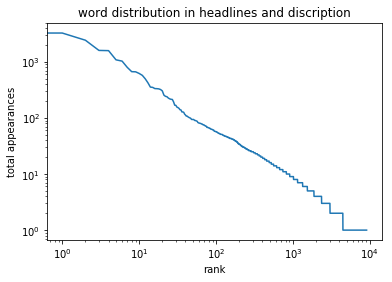

In [274]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([vocabcount[w] for w in vocab]);
plt.gca().set_xscale("log", nonposx='clip')
plt.gca().set_yscale("log", nonposy='clip')
plt.title('word distribution in headlines and discription')
plt.xlabel('rank')
plt.ylabel('total appearances');

In [275]:
empty = 0 # RNN mask of no data
eos = 1  # end of sentence
start_idx = eos+1 # first real word

def get_idx(vocab, vocabcount):
    word2idx = dict((word, idx+start_idx) for idx,word in enumerate(vocab))
    word2idx['<empty>'] = empty
    word2idx['<eos>'] = eos
    
    idx2word = dict((idx,word) for word,idx in word2idx.items())

    return word2idx, idx2word

In [276]:
word2idx, idx2word = get_idx(vocab, vocabcount)

Read Glove

In [277]:
FN  =  'vocabulary-embedding'
seed=42
vocab_size = 40000
embedding_dim = 100
lower = False # dont lower case the text

In [278]:
fname = 'glove.6B.%dd.txt'%embedding_dim
from keras.utils.data_utils import get_file
import os
datadir_base = os.path.expanduser(os.path.join('~', '.keras'))
if not os.access(datadir_base, os.W_OK):
    datadir_base = os.path.join('/tmp', '.keras')
datadir = os.path.join(datadir_base, 'datasets')
glove_name = os.path.join(datadir, fname)
if not os.path.exists(glove_name):
    path = 'glove.6B.zip'
    path = get_file(path, origin="http://nlp.stanford.edu/data/glove.6B.zip")
    !unzip {datadir}/{path}

unzip:  cannot find or open /Users/michellezhao/.keras/datasets//Users/michellezhao/.keras/datasets/glove.6B.zip, /Users/michellezhao/.keras/datasets//Users/michellezhao/.keras/datasets/glove.6B.zip.zip or /Users/michellezhao/.keras/datasets//Users/michellezhao/.keras/datasets/glove.6B.zip.ZIP.


In [283]:
import zipfile
zip = zipfile.ZipFile(path)
zip.extractall()

In [284]:
datadir = ''
glove_name = os.path.join(datadir, fname)
glove_n_symbols = sum(1 for line in open(glove_name))

In [285]:
glove_n_symbols

400000

In [286]:
import numpy as np
glove_index_dict = {}
glove_embedding_weights = np.empty((glove_n_symbols, embedding_dim))
globale_scale=.1
with open(glove_name, 'r') as fp:
    i = 0
    for l in fp:
        l = l.strip().split()
        w = l[0]
        glove_index_dict[w] = i
        glove_embedding_weights[i,:] = list(map(float,l[1:]))
        i += 1
glove_embedding_weights *= globale_scale

In [287]:
glove_embedding_weights.std()

0.040815727600190289

In [288]:
for w, i in  glove_index_dict.items():
    w = w.lower()
    if w not in glove_index_dict:
        glove_index_dict[w] = i

In [289]:
# generate random embedding with same scale as glove
np.random.seed(seed)
shape = (vocab_size, embedding_dim)
scale = glove_embedding_weights.std()*np.sqrt(12)/2 # uniform and not normal
embedding = np.random.uniform(low=-scale, high=scale, size=shape)
print ('random-embedding/glove scale', scale, 'std', embedding.std())

# copy from glove weights of words that appear in our short vocabulary (idx2word)
c = 0
for i in range(vocab_size):
    #print(i)
    if(i not in idx2word):
        continue
    w = idx2word[i]
    #print(w)
    g = glove_index_dict.get(w, glove_index_dict.get(w.lower()))
    if g is None and w.startswith('#'): # glove has no hastags (I think...)
        w = w[1:]
        g = glove_index_dict.get(w, glove_index_dict.get(w.lower()))
    if g is not None:
        embedding[i,:] = glove_embedding_weights[g,:]
        c+=1
print ('number of tokens, in small vocab, found in glove and copied to embedding', c,c/float(vocab_size))


random-embedding/glove scale 0.0706949139514 std 0.0408138249575
number of tokens, in small vocab, found in glove and copied to embedding 7960 0.199


In [290]:
glove_thr = 0.5
word2glove = {}
for w in word2idx:
    if w in glove_index_dict:
        g = w
    elif w.lower() in glove_index_dict:
        g = w.lower()
    elif w.startswith('#') and w[1:] in glove_index_dict:
        g = w[1:]
    elif w.startswith('#') and w[1:].lower() in glove_index_dict:
        g = w[1:].lower()
    else:
        continue
    word2glove[w] = g

In [291]:
normed_embedding = embedding/np.array([np.sqrt(np.dot(gweight,gweight)) for gweight in embedding])[:,None]

nb_unknown_words = 100

glove_match = []
for w,idx in word2idx.items():
    if idx >= vocab_size-nb_unknown_words and w.isalpha() and w in word2glove:
        gidx = glove_index_dict[word2glove[w]]
        gweight = glove_embedding_weights[gidx,:].copy()
        # find row in embedding that has the highest cos score with gweight
        gweight /= np.sqrt(np.dot(gweight,gweight))
        score = np.dot(normed_embedding[:vocab_size-nb_unknown_words], gweight)
        while True:
            embedding_idx = score.argmax()
            s = score[embedding_idx]
            if s < glove_thr:
                break
            if idx2word[embedding_idx] in word2glove :
                glove_match.append((w, embedding_idx, s)) 
                break
            score[embedding_idx] = -1
glove_match.sort(key = lambda x: -x[2])
print ('# of glove substitutes found', len(glove_match))

# of glove substitutes found 0


In [292]:
for orig, sub, score in glove_match[-10:]:
    print (score, orig,'=>', idx2word[sub])

In [293]:
glove_idx2idx = dict((word2idx[w],embedding_idx) for  w, embedding_idx, _ in glove_match)

In [294]:
Y = [[word2idx[token] for token in title.split()] for title in titles]
len(Y)

379

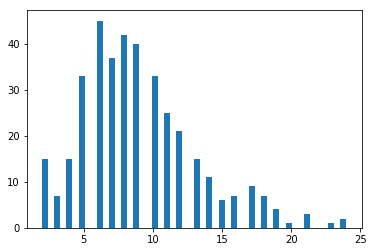

In [295]:
plt.hist(list(map(len,Y)),bins=50);

In [296]:
X = [[word2idx[token] for token in text.split()] for text in texts]
len(X)

379

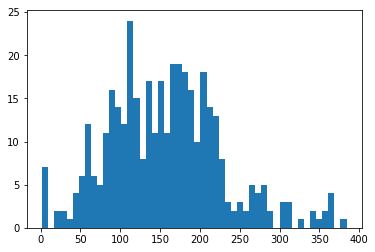

In [297]:
plt.hist(list(map(len,X)),bins=50);

In [298]:
print(embedding)

[[-0.01773875  0.06372642  0.03280158 ..., -0.01024496 -0.06710091
  -0.05544016]
 [-0.06625115  0.01928704 -0.02624818 ...,  0.05614735  0.05473008
   0.03957156]
 [-0.0038194  -0.024487    0.072812   ..., -0.01459     0.08278     0.027062  ]
 ..., 
 [ 0.06982313 -0.02670071 -0.03871925 ..., -0.00267477 -0.01187393
  -0.05748738]
 [ 0.04286668 -0.0481842  -0.01529906 ...,  0.0564503   0.03692646
   0.03450374]
 [ 0.01269256  0.03835368 -0.04946906 ...,  0.01590619 -0.05742016
   0.03449618]]


In [299]:
with open('%s.pkl'%FN,"wb") as fp:
    pickle.dump((embedding, idx2word, word2idx, glove_idx2idx),fp,-1)
    
with open('%s.data.pkl'%FN,"wb") as fp:
    pickle.dump((X,Y),fp,-1)